# Initializations

**Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.io import imread
from skimage.transform import radon, rescale, iradon, iradon_sart
from skimage.transform.radon_transform import _get_fourier_filter

**Download Files**

In [2]:
# Download all photos from public drive - brain, dot then line in that order
!gdown 10DJrOakWDYrJ7LZclIGB57TFhZrbLotW
!gdown 1NWMVC6zRE7j8_m18gIe_ep63EegD-TK2
!gdown 18a0jm1zJIN5O4ViJn8FE9rPc5XWp40Zt


Downloading...
From: https://drive.google.com/uc?id=10DJrOakWDYrJ7LZclIGB57TFhZrbLotW
To: /content/brain.png
100% 3.96k/3.96k [00:00<00:00, 5.09MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NWMVC6zRE7j8_m18gIe_ep63EegD-TK2
To: /content/dot.jpg
100% 2.65k/2.65k [00:00<00:00, 3.11MB/s]
Downloading...
From: https://drive.google.com/uc?id=18a0jm1zJIN5O4ViJn8FE9rPc5XWp40Zt
To: /content/line.jpg
100% 2.05k/2.05k [00:00<00:00, 2.87MB/s]


# Functions

In [3]:
def convert_image_to_sinogram(image_path, number_of_projection_angle=180):
  # This function is getting the image_path and the number_of_projection_angle that initalized to 180

  # Load image and convert to Gray-scale
  image = imread(image_path, as_gray=True)

  # Original plot configuration
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
  ax1.set_title(f"Original\n {image_path}")
  ax1.imshow(image, cmap=plt.cm.Greys_r)

  # Calculate theta 
  theta = np.linspace(0, 180., number_of_projection_angle, endpoint=False)
  
  # Calculate sinogram for image using theta 
  sinogram = radon(image, theta=theta)

  # Sinogram plot configuration
  dx, dy = 0.5 * 180. / max(image.shape), 0.5 / sinogram.shape[0]
  ax2.set_title("Radon transform\n(Sinogram)")
  ax2.set_xlabel(f"Projection angle ({number_of_projection_angle=})")
  ax2.set_ylabel("Projection position (pixels)")

  # Present sinogram plot 
  ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, number_of_projection_angle + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

  fig.tight_layout()
  plt.show()
  return sinogram

In [4]:
def reconstruction(sinogram, number_of_projection_angle=180,filter_back=None):
  # This function is getting the sinogram, the filter_back initlized to NONE and the number_of_projection_angle initalized to 180

  # by this calling we will get the reconstruction property
  reconstruction_fbp = reconstruction_calculation(sinogram, number_of_projection_angle, filter_back)

 # Present reconstruction 
  imkwargs = dict(vmin=-0.2, vmax=0.2)
  fig, (ax1) = plt.subplots(1, 1, figsize=(8, 4.5),
                                sharex=True, sharey=True)
  ax1.set_title("Reconstruction\n back projection")
  ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
  plt.show()

In [5]:
def reconstruction_calculation(sinogram, number_of_projection_angle ,filter_back ):
   # This function is getting the sinogram, the filter_back initlized to NONE and the number_of_projection_angle initalized to 180

  print(number_of_projection_angle)
   # Calculate theta 
  theta = np.linspace(0, 180., number_of_projection_angle, endpoint=False)
  # Calculate reconstruction sinogram for image using theta 
  reconstruction_fbp = iradon(sinogram, theta=theta, filter_name=filter_back)
  
  return reconstruction_fbp

# Step 1- Calculate Sinogram


> Create a head phantom or use the Shepp-Logan head phantom. The bright ellipse corresponds to the skull and the structures inside correspond to the various brain tissues and lesions.  Calculate the synthetic projection using radon transform (parallel beam geometry) for the head phantom and the geometric images and explain your results.



**First Image- Brain**

/usr/local/lib/python3.9/dist-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


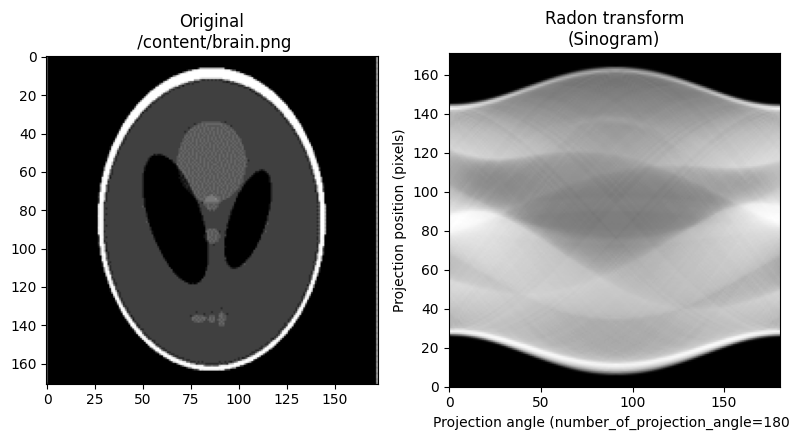

180


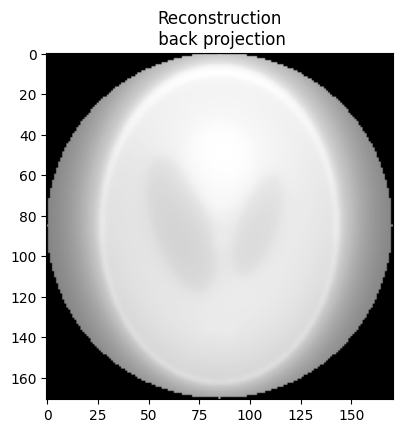

In [6]:
sinogram= convert_image_to_sinogram('/content/brain.png')
reconstruction(sinogram)

**Second Image- DOT**

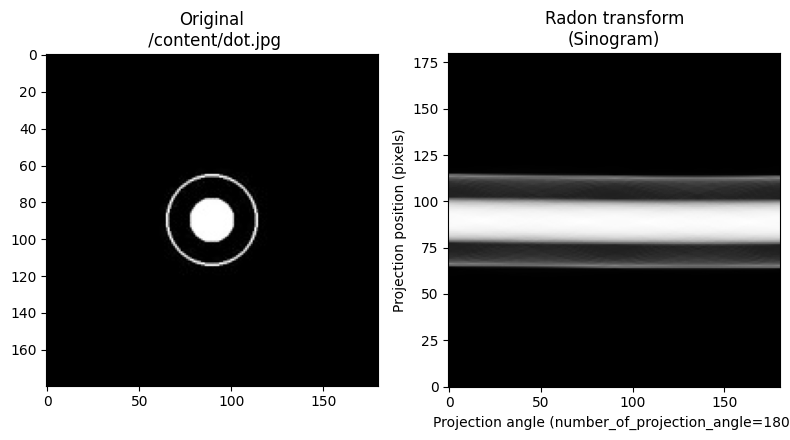

180


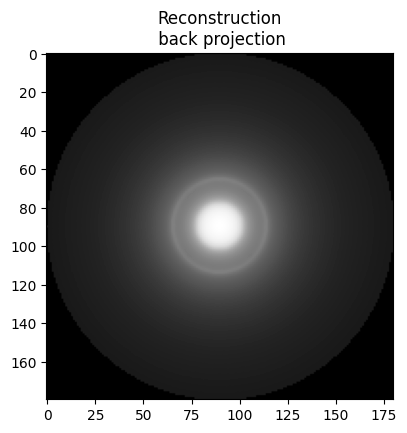

In [7]:
sinogram=convert_image_to_sinogram('/content/dot.jpg')
reconstruction(sinogram)

**Thirs Image- Line**

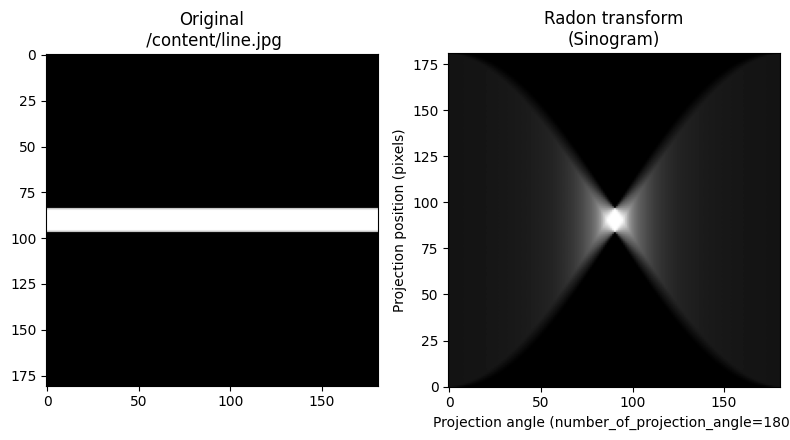

180


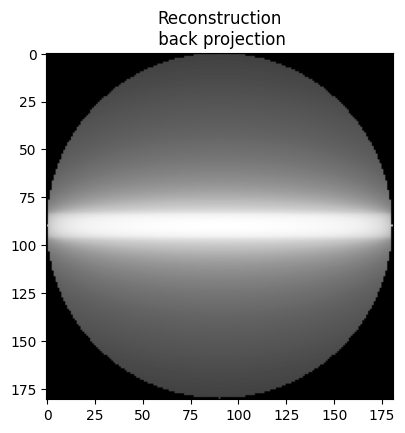

In [8]:
sinogram= convert_image_to_sinogram('/content/line.jpg')
reconstruction(sinogram)

# Step 2- Reconstrucion using various number of projection angles 


> Vary the number of projection angles (18,24,90,... ) and perform a reconstruction for each angle increment. Explain the effect of varying the angles.



## Brain 

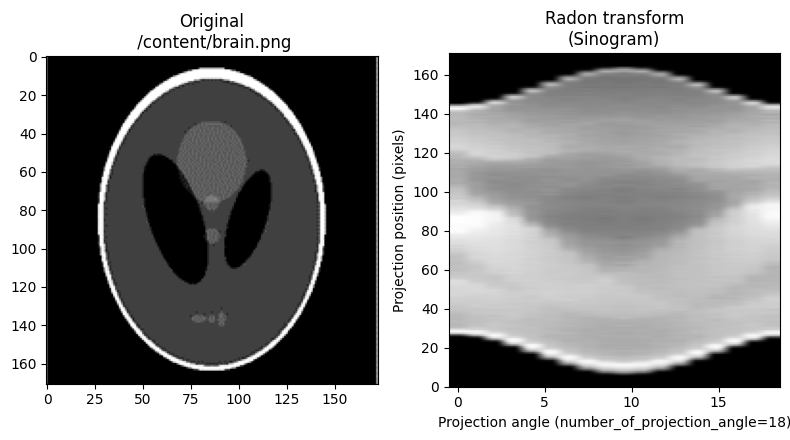

18


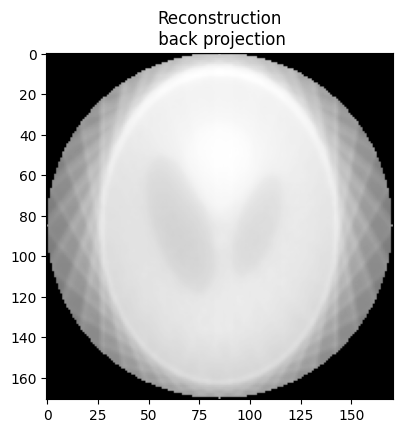

In [10]:
sinogram=convert_image_to_sinogram('/content/brain.png',18)
reconstruction(sinogram, 18, None)

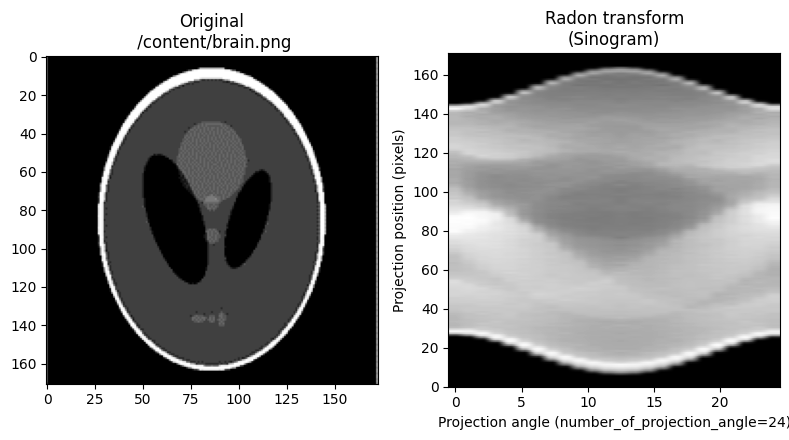

24


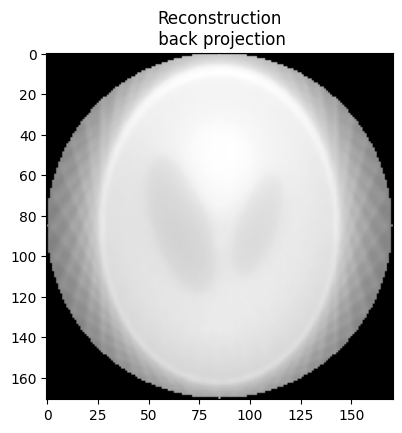

In [11]:
sinogram=convert_image_to_sinogram('/content/brain.png',24)
reconstruction(sinogram, 24, None)

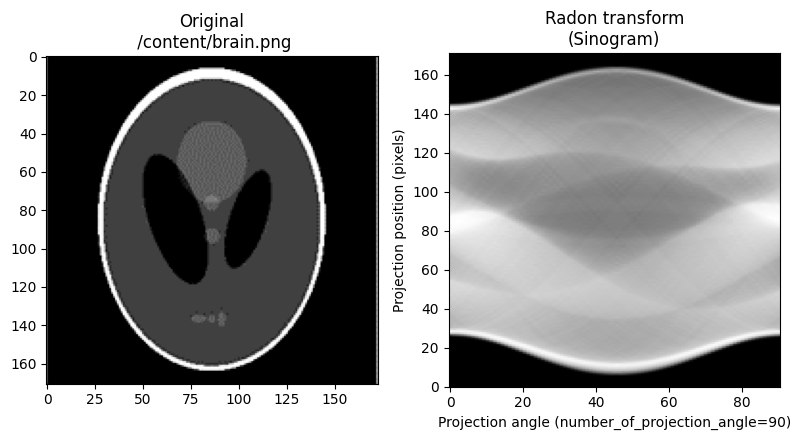

90


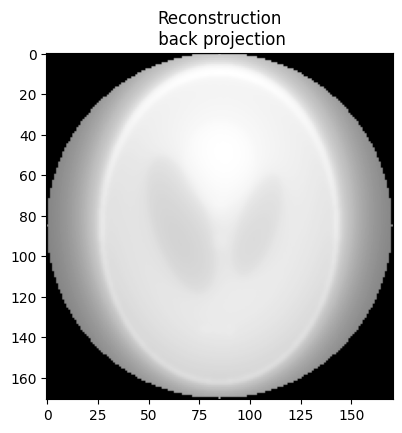

In [12]:
sinogram=convert_image_to_sinogram('/content/brain.png',90)
reconstruction(sinogram, 90, None)

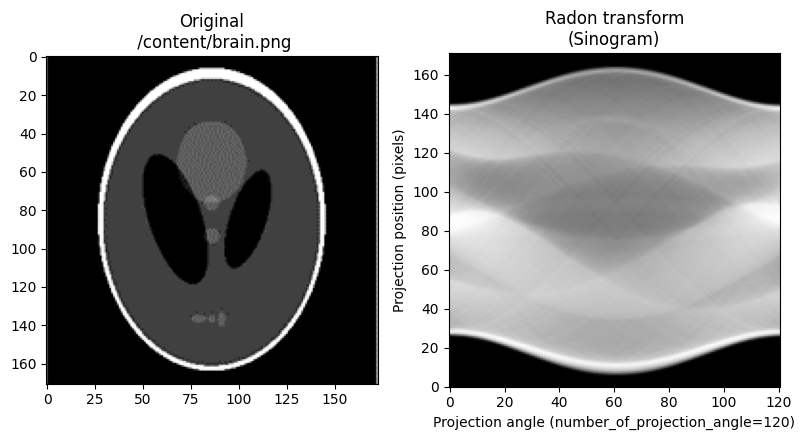

120


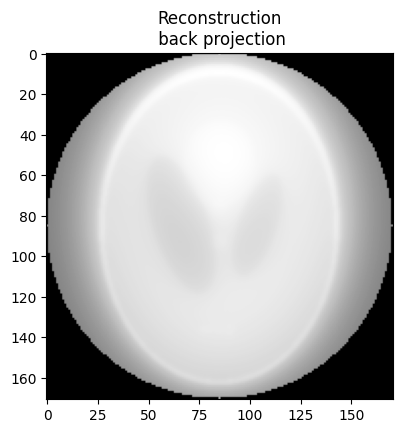

In [13]:
sinogram=convert_image_to_sinogram('/content/brain.png',120)
reconstruction(sinogram, 120, None)

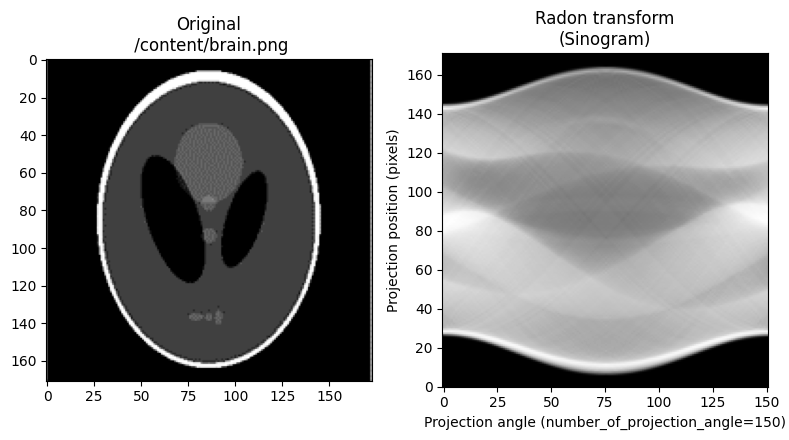

150


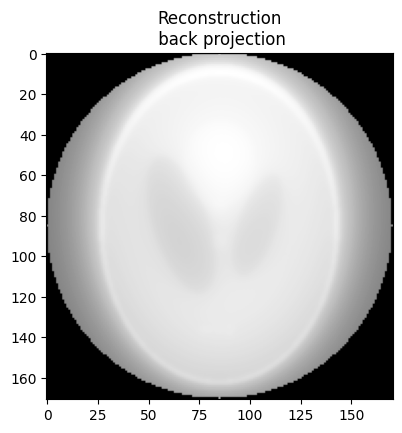

In [14]:
sinogram=convert_image_to_sinogram('/content/brain.png',150)
reconstruction(sinogram, 150, None)

## Dot

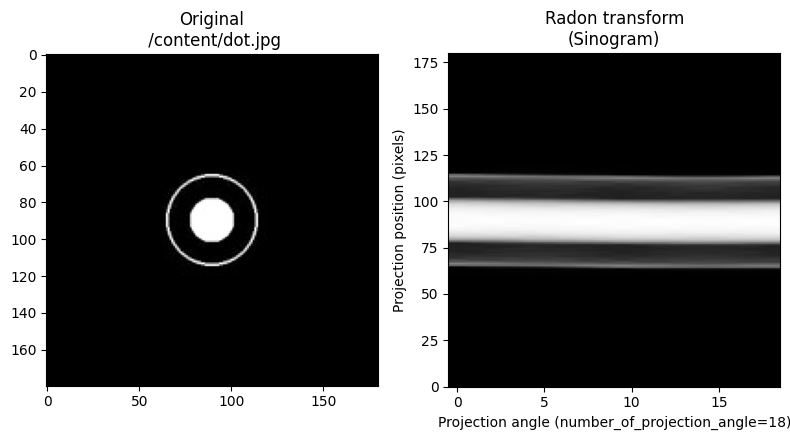

18


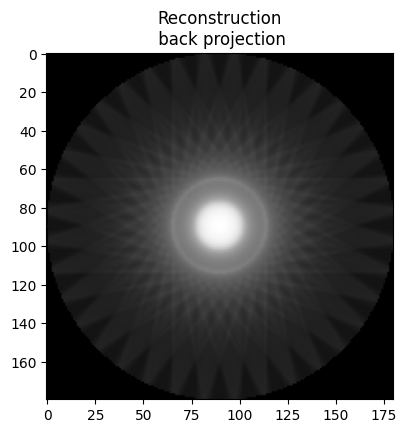

In [15]:
sinogram=convert_image_to_sinogram('/content/dot.jpg', 18)
reconstruction(sinogram, 18, None)

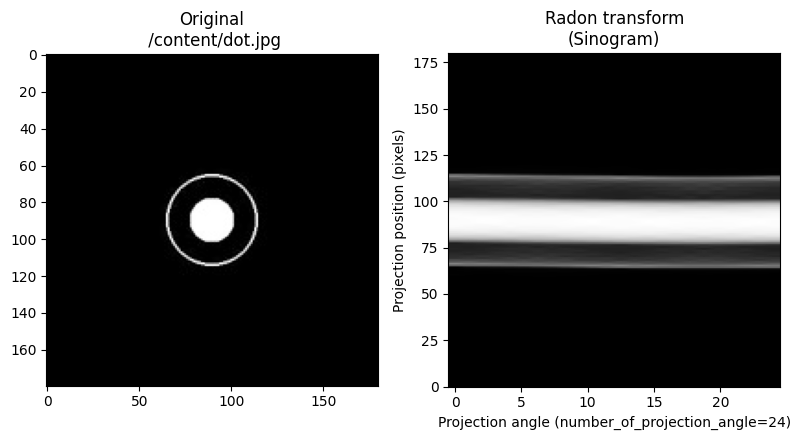

24


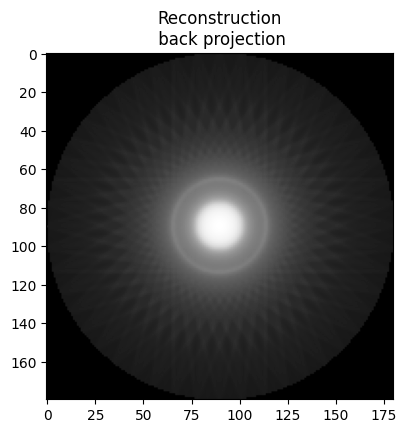

In [16]:
sinogram=convert_image_to_sinogram('/content/dot.jpg', 24)
reconstruction(sinogram, 24, None)

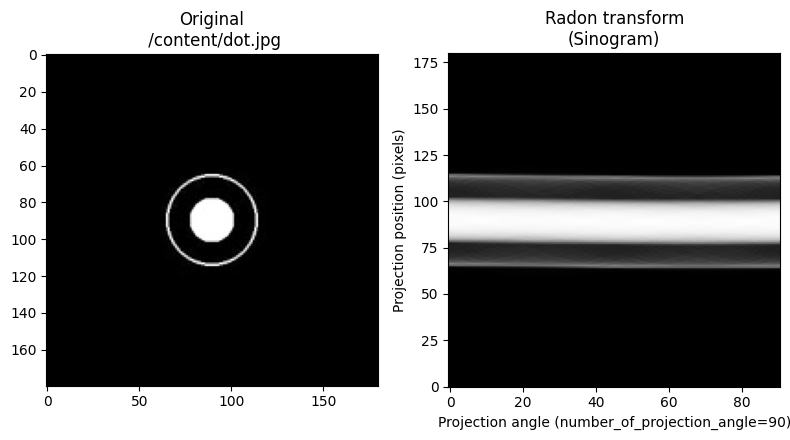

90


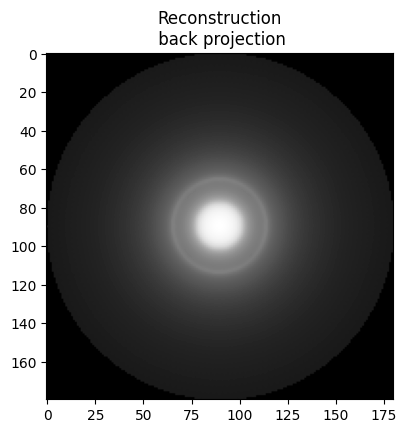

In [17]:
sinogram=convert_image_to_sinogram('/content/dot.jpg', 90)
reconstruction(sinogram, 90, None)

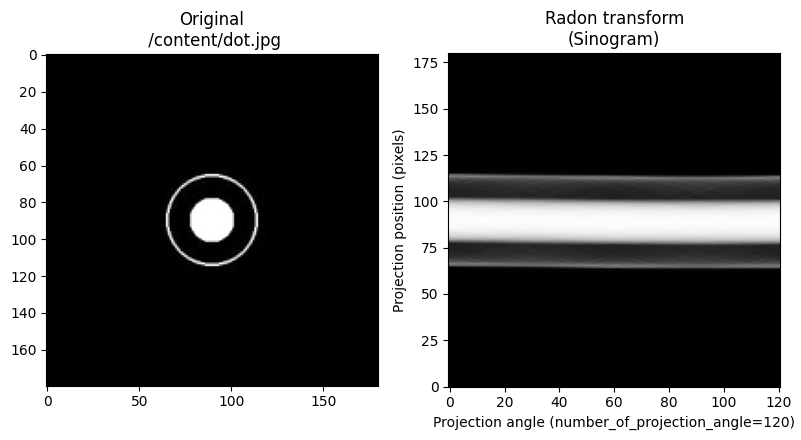

120


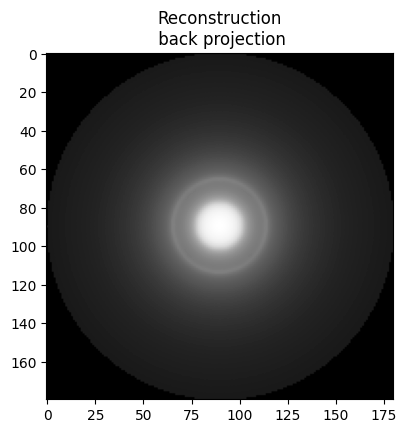

In [18]:
sinogram=convert_image_to_sinogram('/content/dot.jpg', 120)
reconstruction(sinogram, 120, None)

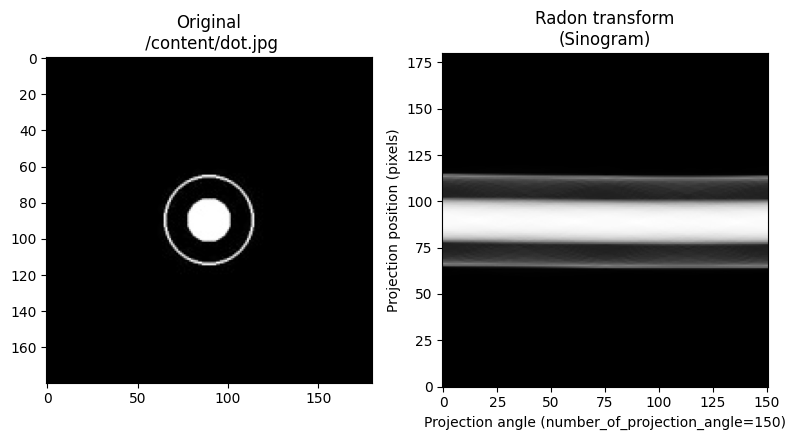

150


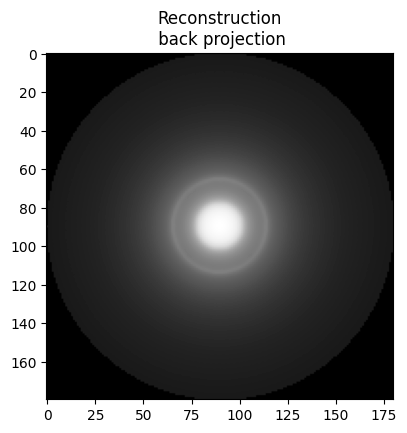

In [19]:
sinogram=convert_image_to_sinogram('/content/dot.jpg', 150)
reconstruction(sinogram, 150, None)

## Line

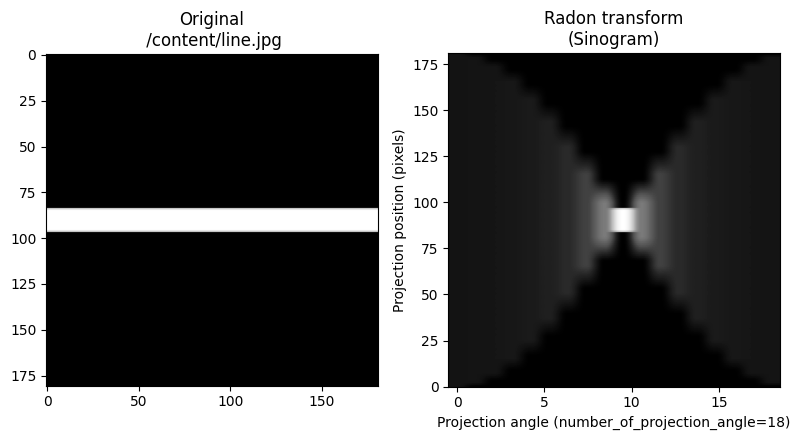

18


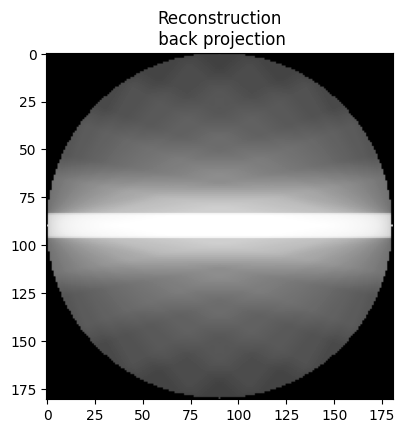

In [20]:
sinogram=convert_image_to_sinogram('/content/line.jpg', 18)
reconstruction(sinogram, 18, None)

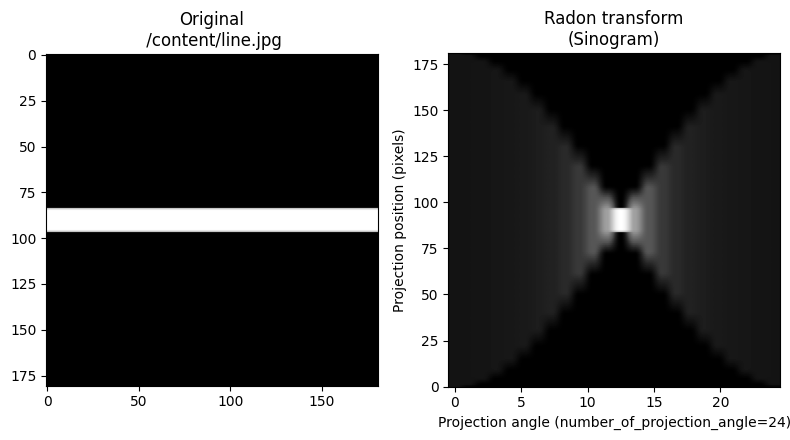

24


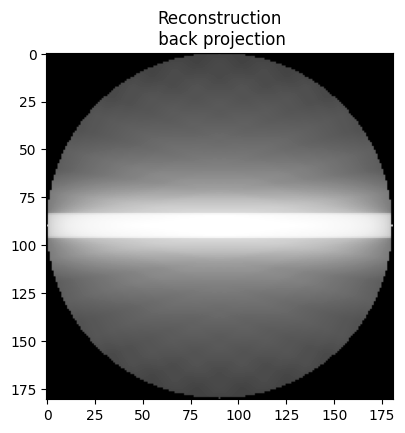

In [21]:
sinogram=convert_image_to_sinogram('/content/line.jpg', 24)
reconstruction(sinogram, 24, None)

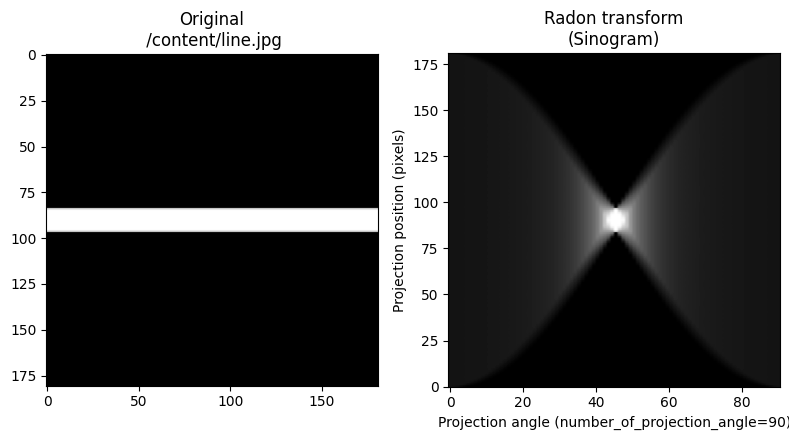

90


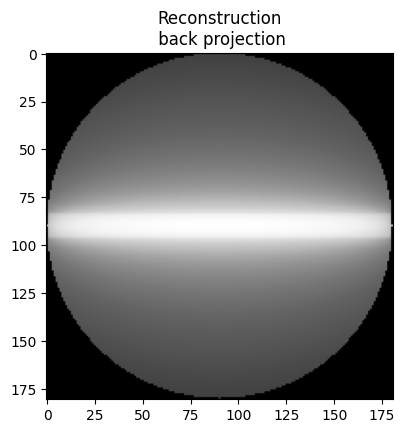

In [22]:
sinogram=convert_image_to_sinogram('/content/line.jpg', 90)
reconstruction(sinogram, 90, None)

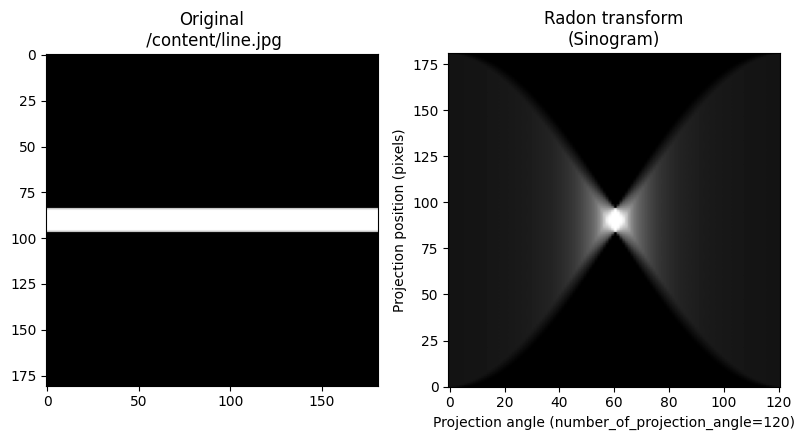

120


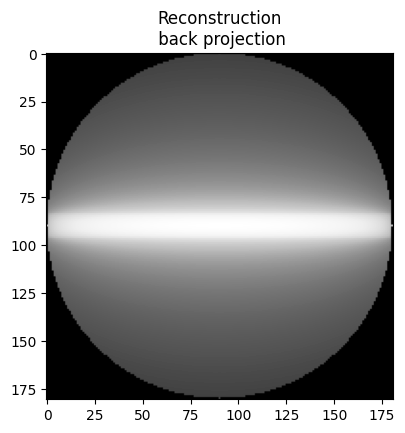

In [23]:
sinogram=convert_image_to_sinogram('/content/line.jpg', 120)
reconstruction(sinogram, 120, None)

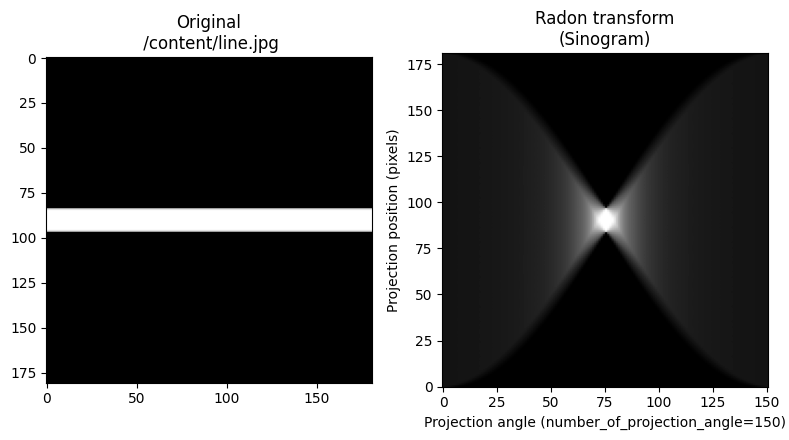

150


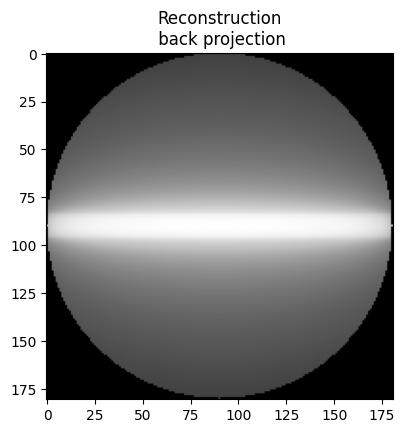

In [24]:
sinogram=convert_image_to_sinogram('/content/line.jpg', 150)
reconstruction(sinogram, 150, None)

# Step 3- Back projection & Filtered back projection

## Brain 

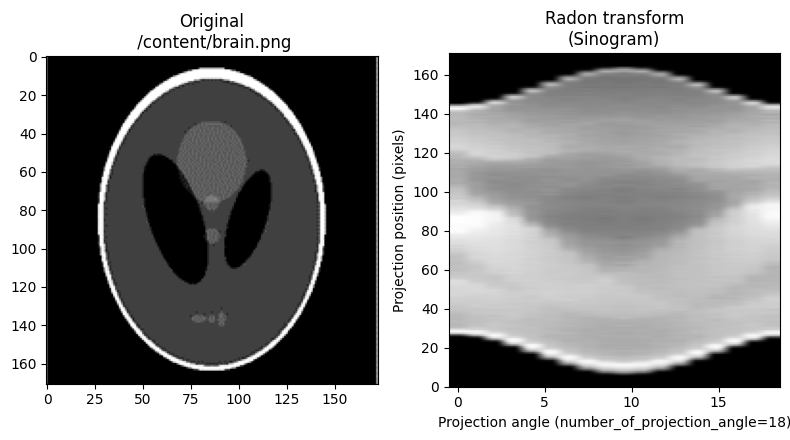

18


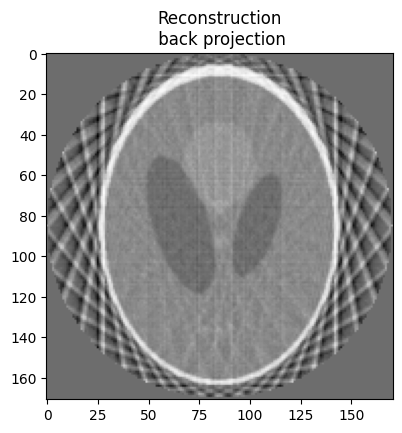

In [26]:
sinogram=convert_image_to_sinogram('/content/brain.png',18)
reconstruction(sinogram,18,'shepp-logan')

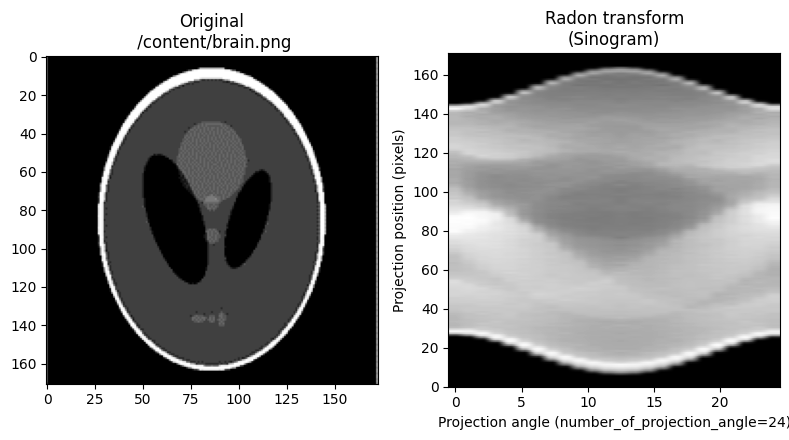

24


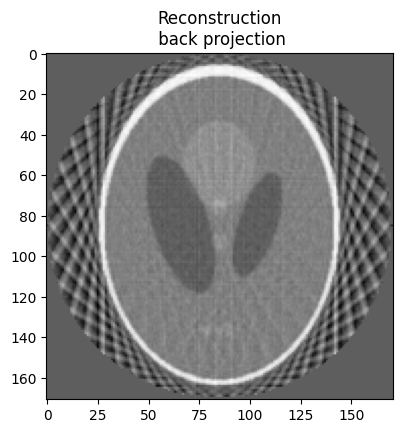

In [27]:
sinogram=convert_image_to_sinogram('/content/brain.png',24)
reconstruction(sinogram,24,'shepp-logan')

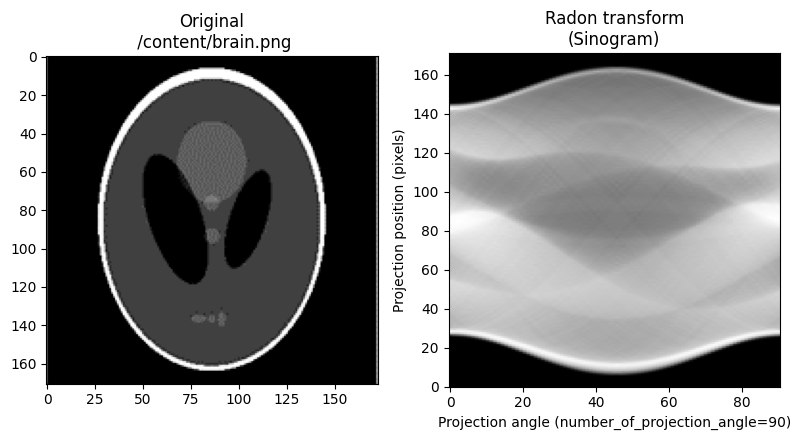

90


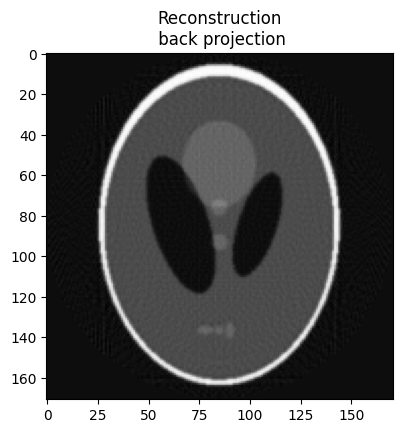

In [28]:
sinogram=convert_image_to_sinogram('/content/brain.png',90)
reconstruction(sinogram,90,'shepp-logan')

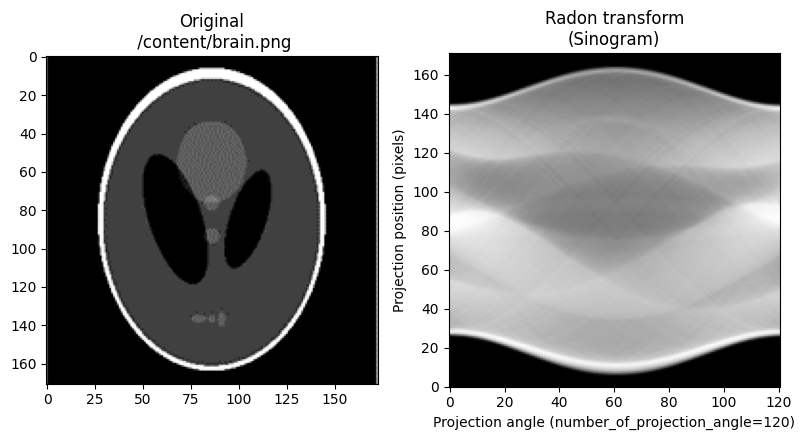

120


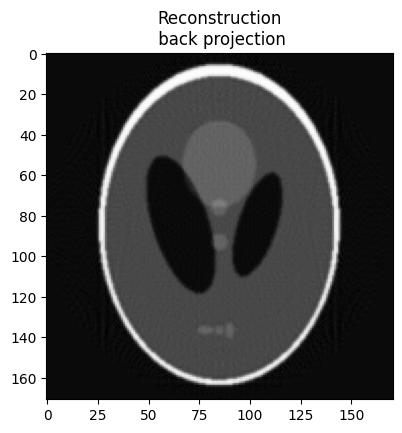

In [29]:
sinogram=convert_image_to_sinogram('/content/brain.png',120)
reconstruction(sinogram,120,'shepp-logan')

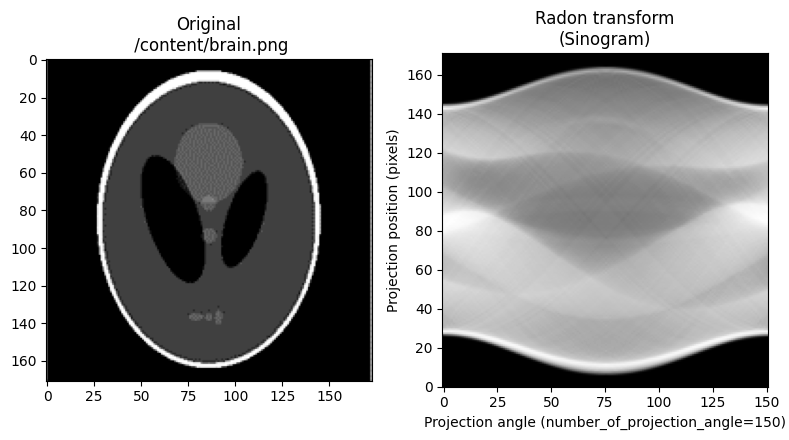

150


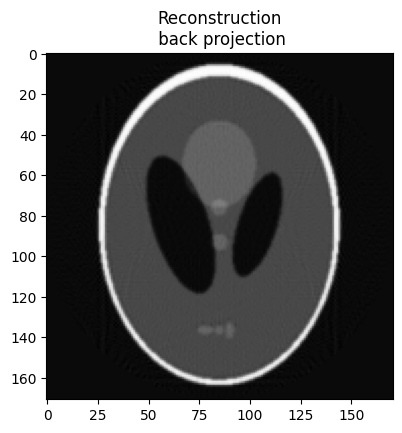

In [30]:
sinogram=convert_image_to_sinogram('/content/brain.png',150)
reconstruction(sinogram,150,'shepp-logan')

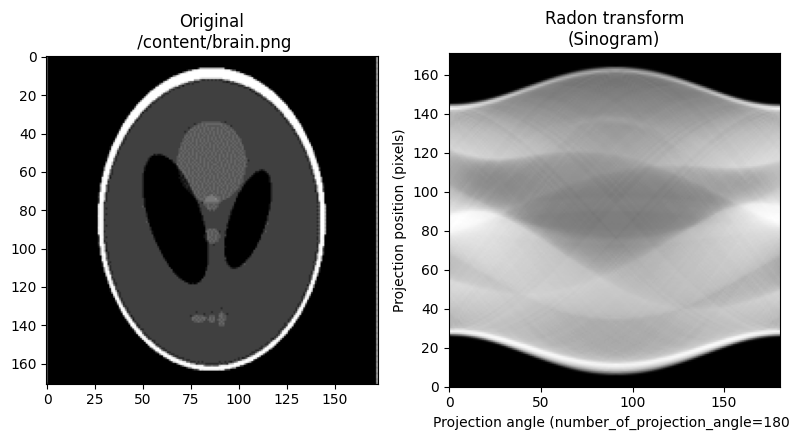

180


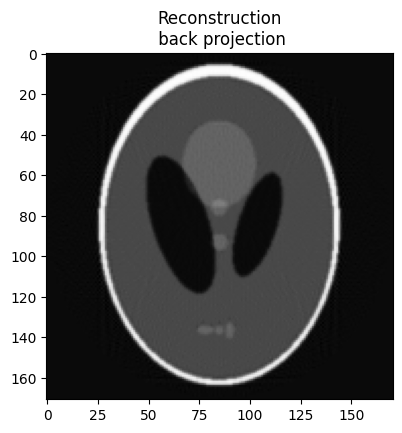

In [31]:
sinogram=convert_image_to_sinogram('/content/brain.png',180)
reconstruction(sinogram,180,'shepp-logan')

## Dot

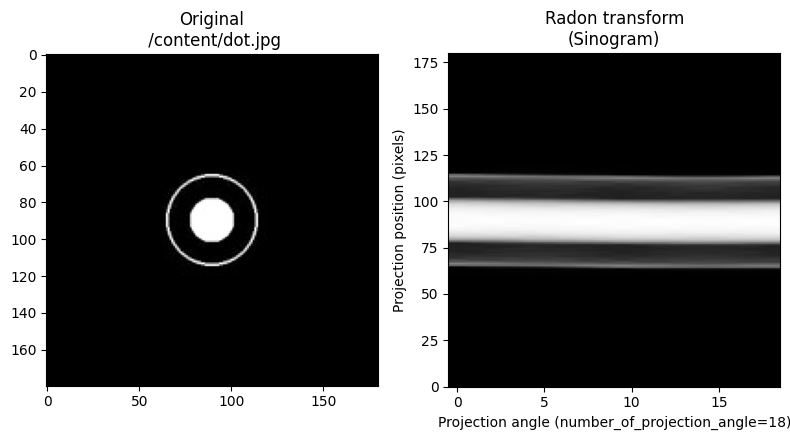

18


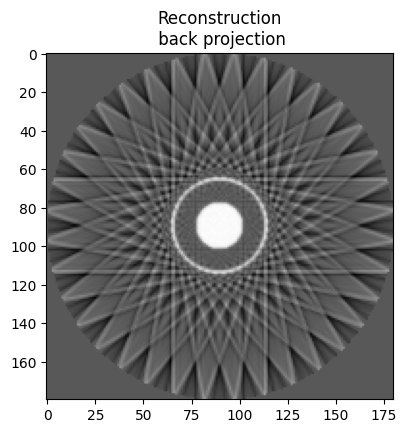

In [33]:
sinogram=convert_image_to_sinogram('/content/dot.jpg', 18)
reconstruction(sinogram,18,'shepp-logan')

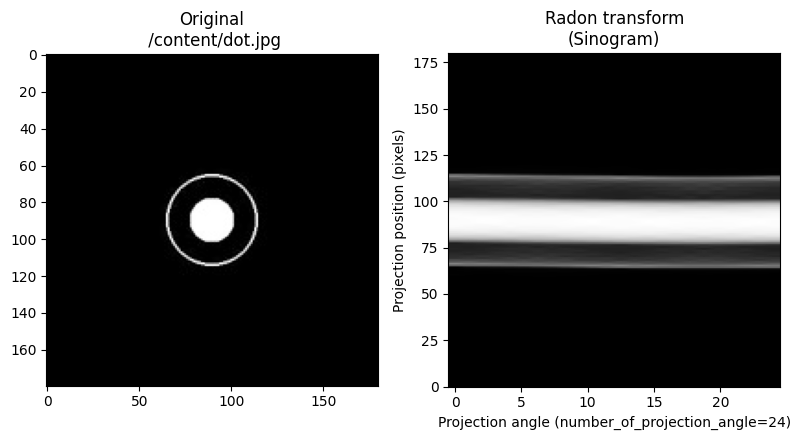

24


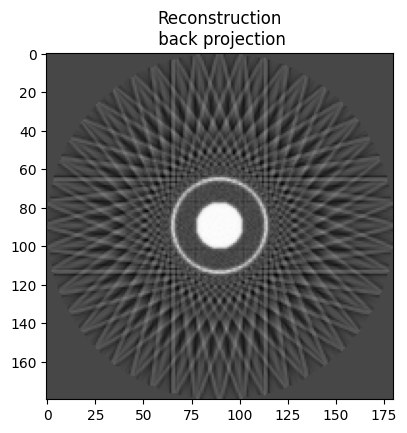

In [34]:
sinogram=convert_image_to_sinogram('/content/dot.jpg', 24)
reconstruction(sinogram,24,'shepp-logan')

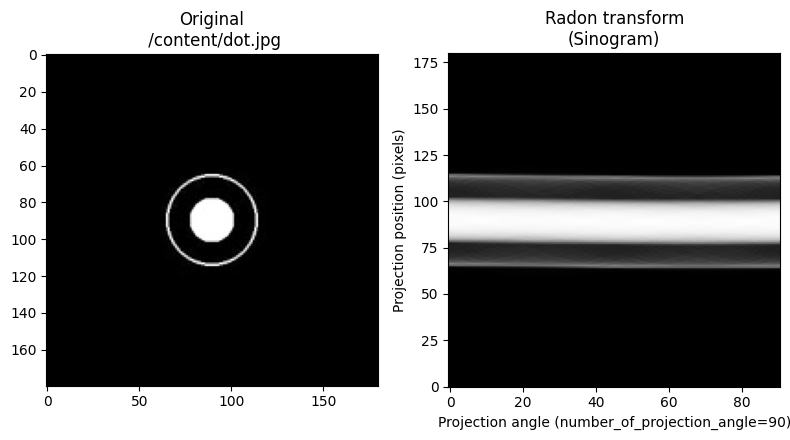

90


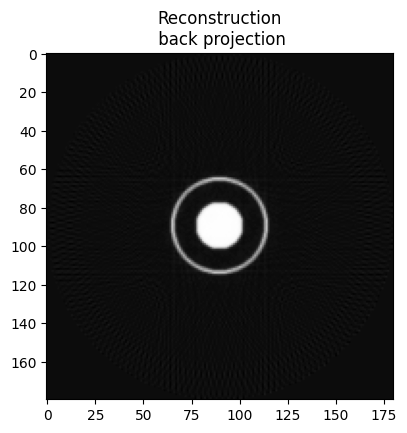

In [35]:
sinogram=convert_image_to_sinogram('/content/dot.jpg', 90)
reconstruction(sinogram,90,'shepp-logan')

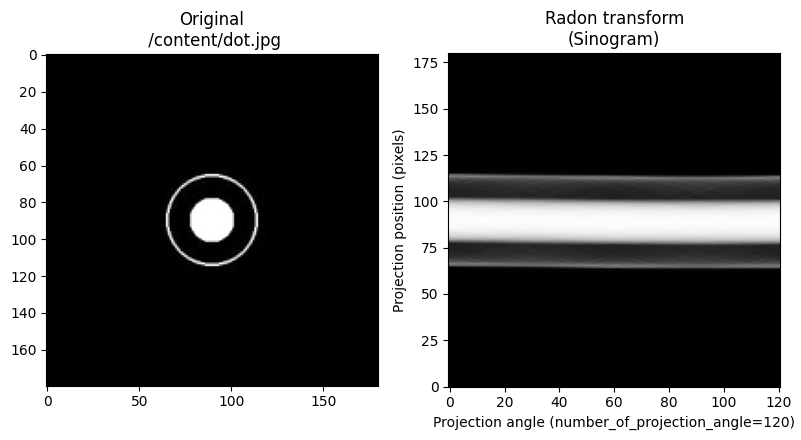

120


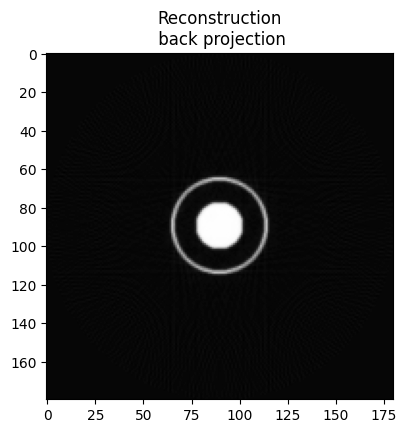

In [36]:
sinogram=convert_image_to_sinogram('/content/dot.jpg', 120)
reconstruction(sinogram,120,'shepp-logan')

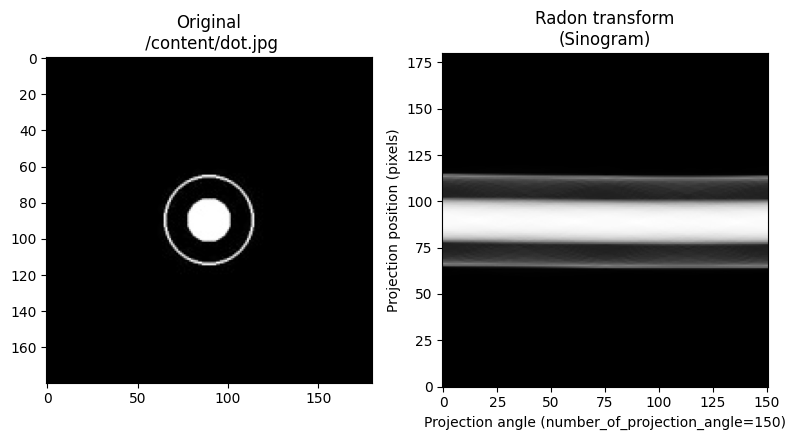

150


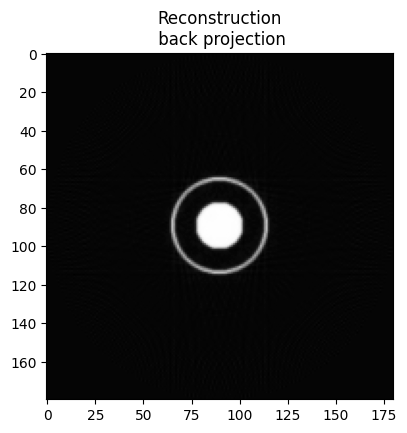

In [37]:
sinogram=convert_image_to_sinogram('/content/dot.jpg', 150)
reconstruction(sinogram,150,'shepp-logan')

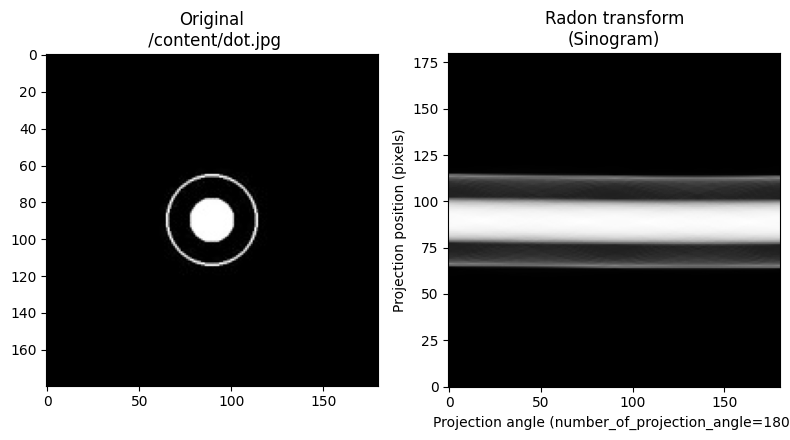

180


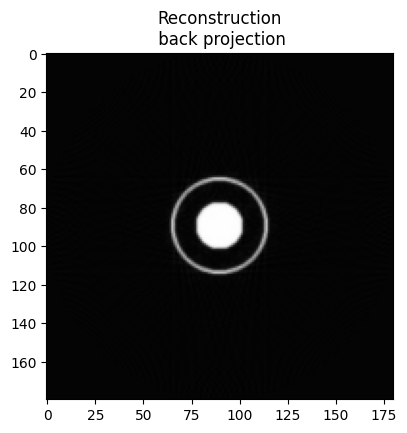

In [38]:
sinogram=convert_image_to_sinogram('/content/dot.jpg', 180)
reconstruction(sinogram,180,'shepp-logan')

## Line

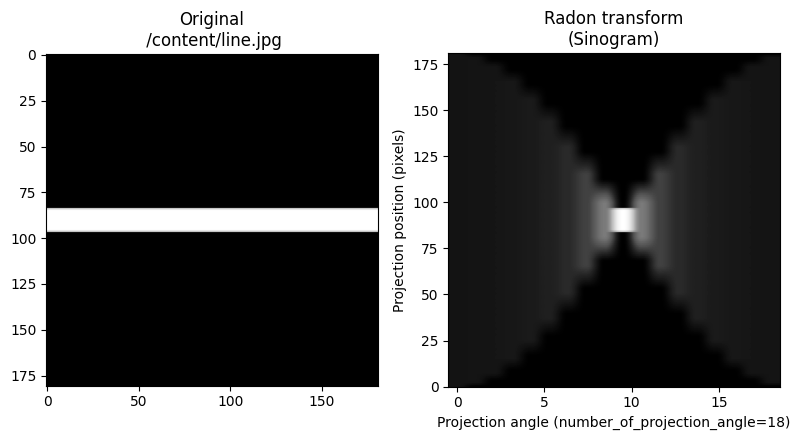

18


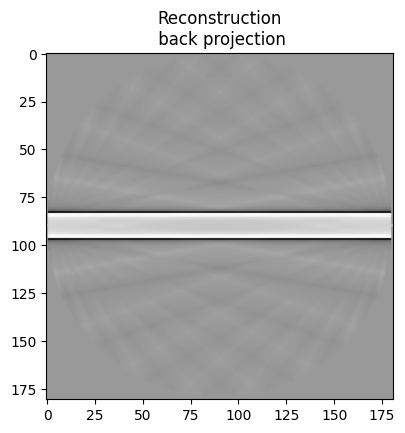

In [39]:
sinogram=convert_image_to_sinogram('/content/line.jpg', 18)
reconstruction(sinogram,18,'shepp-logan')

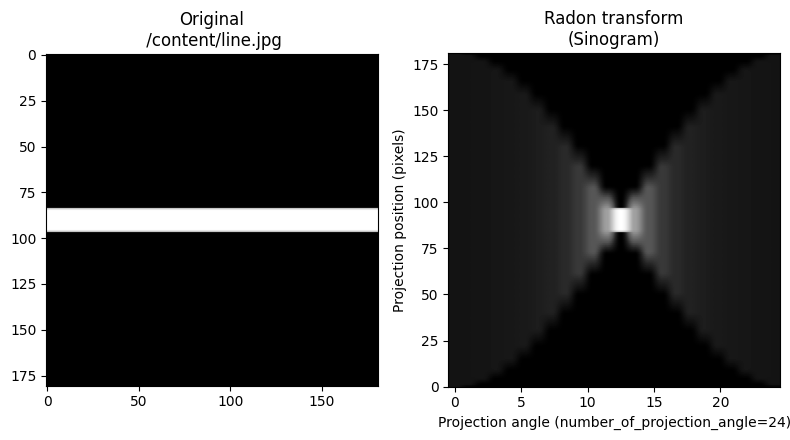

24


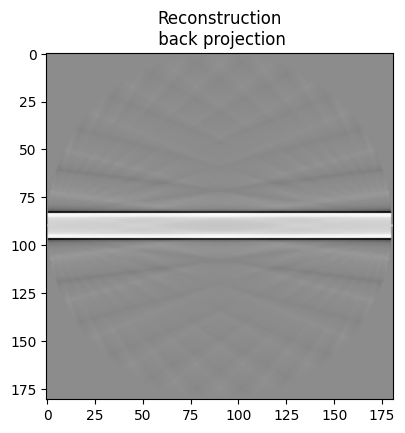

In [40]:
sinogram=convert_image_to_sinogram('/content/line.jpg', 24)
reconstruction(sinogram,24,'shepp-logan')

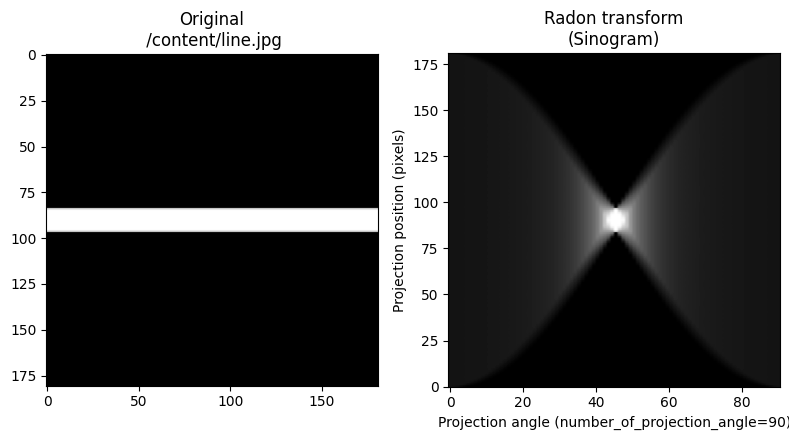

90


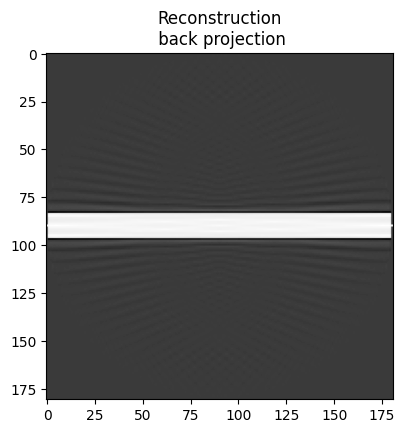

In [41]:
sinogram=convert_image_to_sinogram('/content/line.jpg', 90)
reconstruction(sinogram,90,'shepp-logan')

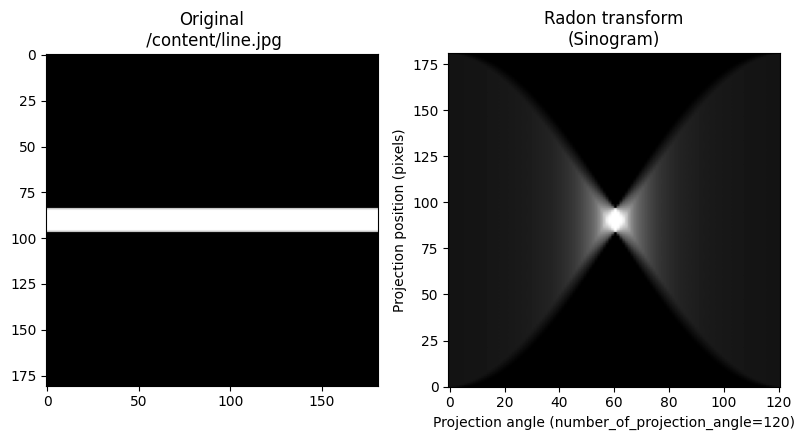

120


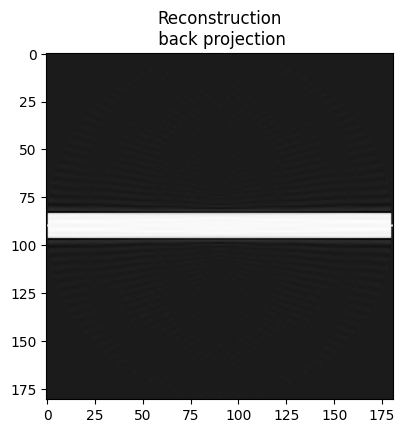

In [42]:
sinogram=convert_image_to_sinogram('/content/line.jpg', 120)
reconstruction(sinogram,120,'shepp-logan')

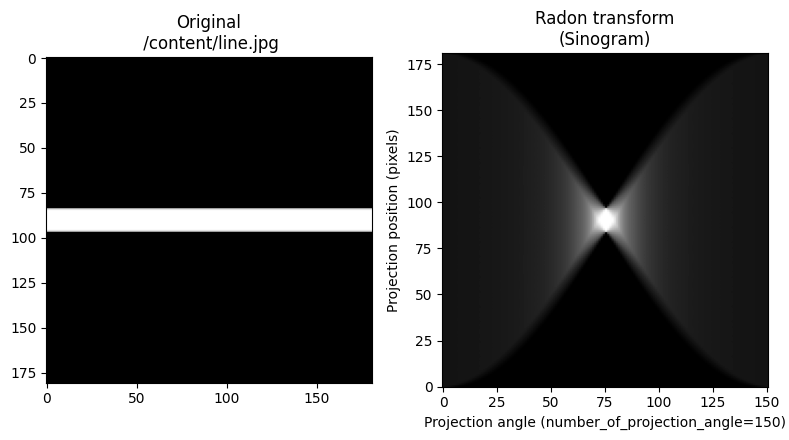

150


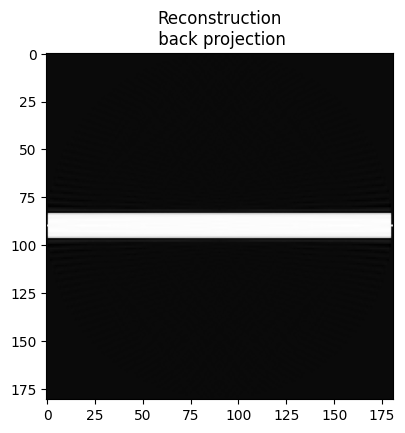

In [43]:
sinogram=convert_image_to_sinogram('/content/line.jpg', 150)
reconstruction(sinogram,150,'shepp-logan')

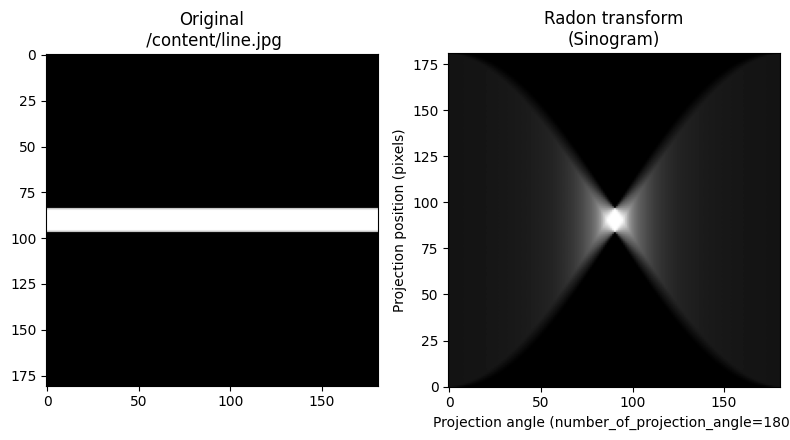

180


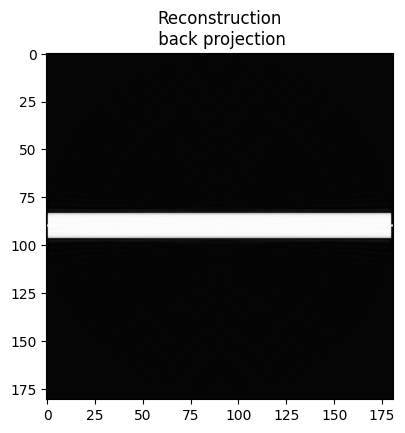

In [44]:
sinogram=convert_image_to_sinogram('/content/line.jpg', 180)
reconstruction(sinogram,180,'shepp-logan')

# Step 4- Algebraic Iterative Reconstruction 

In [45]:
def sart_iterative(sinogram, number_of_projection_angle=180):

  theta = np.linspace(0, 180., number_of_projection_angle, endpoint=False)
  iterations = 12
  fig, axes = plt.subplots(3, 4, figsize=(15, 10))
  axes = axes.ravel()
  image = imread('/content/brain.png', as_gray=True)
  sinogram = radon(image, theta=theta)
  reconstructed_image = iradon_sart(sinogram, theta=theta)
  plt.imshow(sinogram, interpolation='nearest')
  for i in range(iterations): 
    axes[i].set_title(f"{i+1} iterations")
    axes[i].imshow(reconstructed_image, cmap=plt.cm.Greys_r)
    reconstructed_image = iradon_sart(sinogram, theta=theta, image=reconstructed_image)

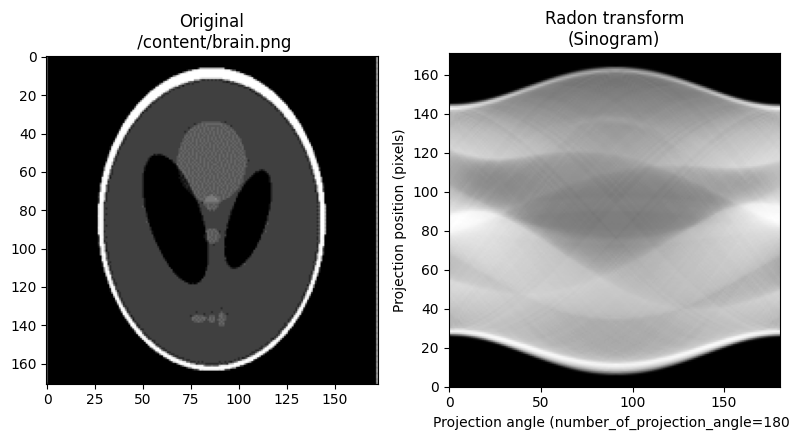

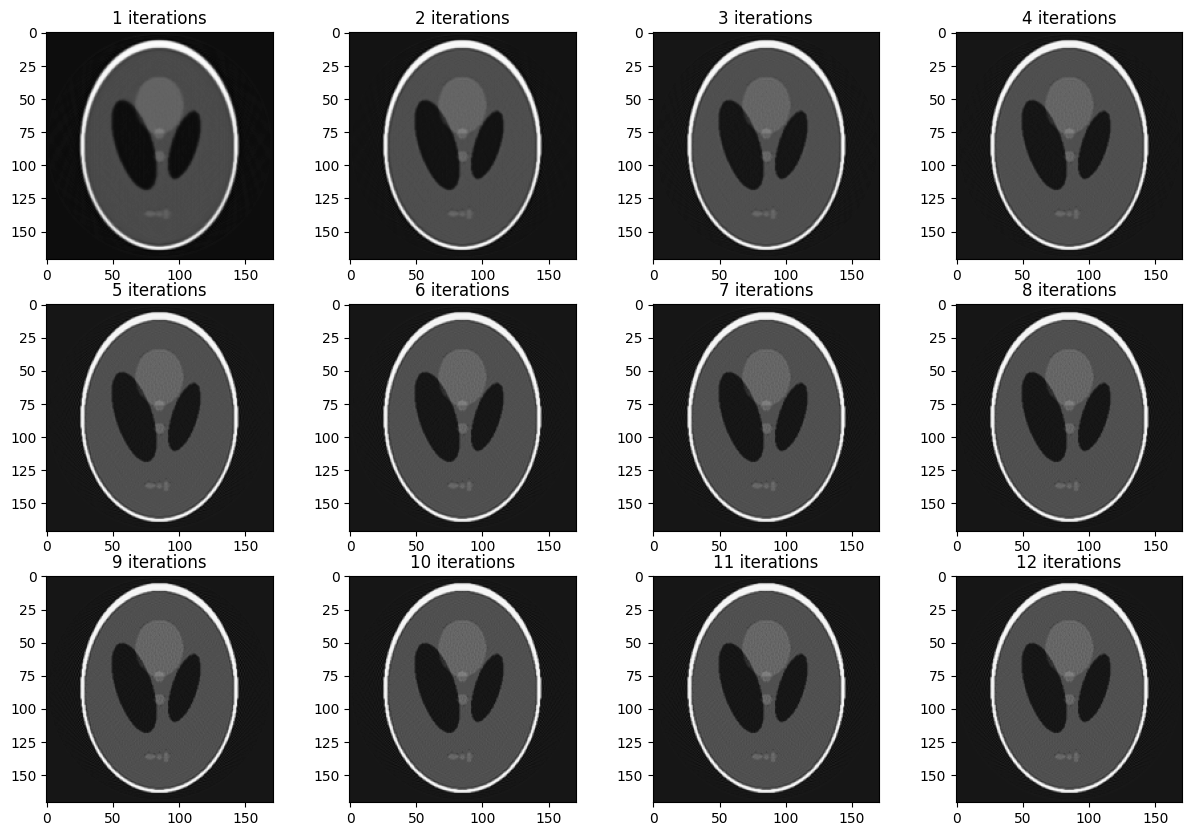

In [46]:
sinogram=convert_image_to_sinogram('/content/brain.png', 180)
sart_iterative(sinogram,180)